# Los Angeles County Fire Department Fleet

### Import Python tools

In [11]:
import pandas as pd
import geopandas as gpd
import squarify
import matplotlib
import matplotlib.pyplot as plt
import geojson
import json
import jenkspy
import numpy as np
from earthpy import clip as cl
from altair import datum
import weightedcalcs as wc
import altair as alt
alt.renderers.enable('notebook')
import altair_latimes as lat
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')
pd.options.display.max_columns = 50
pd.options.display.max_rows = 1000

In [23]:
# data received via CPRA
src = pd.read_excel('/Users/mhustiles/data/data/lacounty/Fleet_Apparatus_Listing_12-20-18.xlsx').fillna('')

In [24]:
src.columns = src.columns.str.strip().str.lower().str.replace(' ', '_')\
                    .str.replace('(', '').str.replace(')', '').str.replace('-','_')

In [27]:
fleet = pd.DataFrame(src)

### What's the model year breakdown of their vehicles?

In [28]:
fleet.head()

,vehicle_#,make,model,year,stat_summary_catagory,type
0,F2867,FREIGHTLINER,CASCADIA,2019,,TRUCK TRACTOR
1,F2868,FREIGHTLINER,CASCADIA,2019,,TRUCK TRACTOR
2,F2869,FREIGHTLINER,CASCADIA,2019,,TRUCK TRACTOR
3,F2826,RAM,4500,2017,,AMBULANCE
4,49030,DODGE,D 200,1974,,RESCUE STD CAB


In [30]:
years = fleet.groupby('year').agg('size').reset_index(name='vehicles')

In [67]:
makes = fleet.groupby('make', 'year').agg('size').reset_index(name='vehicles')

In [87]:
engines = fleet[fleet['stat_summary_catagory'].str.contains('ENGINE')]\
    .groupby(['type', 'year']).agg('size').reset_index(name='vehicles')

In [88]:
engines.head()

,type,year,vehicles
0,PUMPER,1972.0,1
1,PUMPER,1976.0,1
2,PUMPER,1977.0,1
3,PUMPER,1985.0,1
4,PUMPER,1990.0,2


In [89]:
len(engines)

32

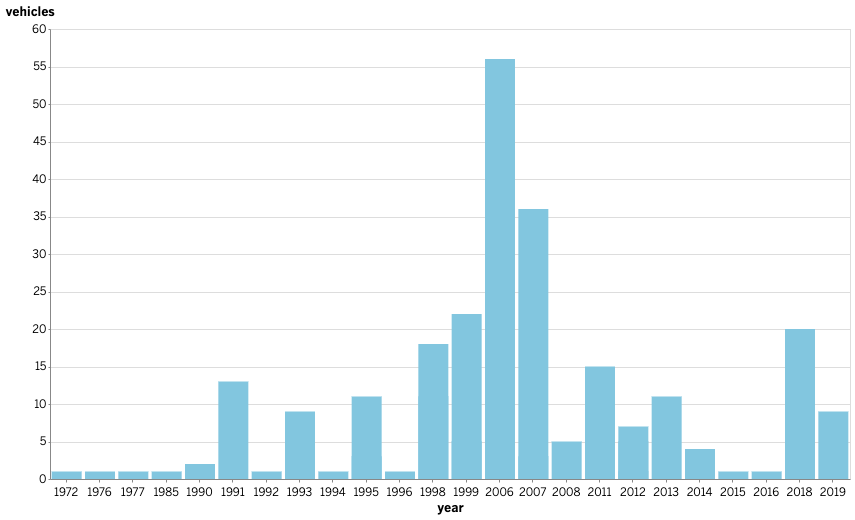

In [90]:
alt.Chart(engines).mark_bar().encode(
    x='year:N',
    y='vehicles:Q'
).properties(width=800)